# Render a scene of random spheres

In [1]:
using Images
using FileIO

In [2]:
include("../src/Raytracing.jl")
using .Raytracing

In [3]:
# image dimensions (pixel)
nx = 1200
ny =  800;

In [4]:
# define camera
lookfrom = [13., 2., 3.]
lookat = zeros(3)
vup = [0., 1., 0.]
vfov = π/9
aperture = 0.1
focus_dist = 10
camera = Camera(lookfrom, lookat, vup, vfov, nx / ny, aperture, focus_dist);

In [5]:
# utility function for generating a random number according to triangular distribution
function triangular_rand(a, b, c)
    b_m_a = b - a
    u = rand()
    b_m_a * u < (c - a) ? a + sqrt(u * b_m_a * (c - a)) :
                          b - sqrt((1 - u) * b_m_a * (b - c))
end

triangular_rand (generic function with 1 method)

In [6]:
# define scene geometry
scene = SurfaceAssembly([])
# three large spheres
push!(scene.objects, Sphere([ 4., 1., 0.], 1.0, Metal([0.7, 0.6, 0.5], 0.)))
push!(scene.objects, Sphere([ 0., 1., 0.], 1.0, Dielectric(1.5)))
push!(scene.objects, Sphere([-4., 1., 0.], 1.0, Lambertian([0.4, 0.2, 0.1])))
# smaller spheres with random parameters
for a in -11:11
    for b in -11:11
        center = [a + 0.9*rand(), 0.2 + 0.1*rand(), b + 0.9*rand()]
        # non-uniform random choice between diffusive, metal or dielectric (glass)
        pchoose = rand()
        if pchoose < 0.8
            # diffusive
            push!(scene.objects, Sphere(center, 0.2, Lambertian([triangular_rand(0., 0.2, 1.) for i in 1:3])))
        elseif pchoose < 0.8 + 0.15
            # metal
            push!(scene.objects, Sphere(center, 0.2, Metal(0.5*(1 .+ rand(3)), 0.5*rand())))
        else
            # dielectric (glass)
            push!(scene.objects, Sphere(center, 0.2, Dielectric(1.5)))
        end
    end
end
# large "globe" sphere imitating ground floor
push!(scene.objects, Sphere([0., -1000., 0.], 1000., Lambertian([0.5, 0.5, 0.5])));

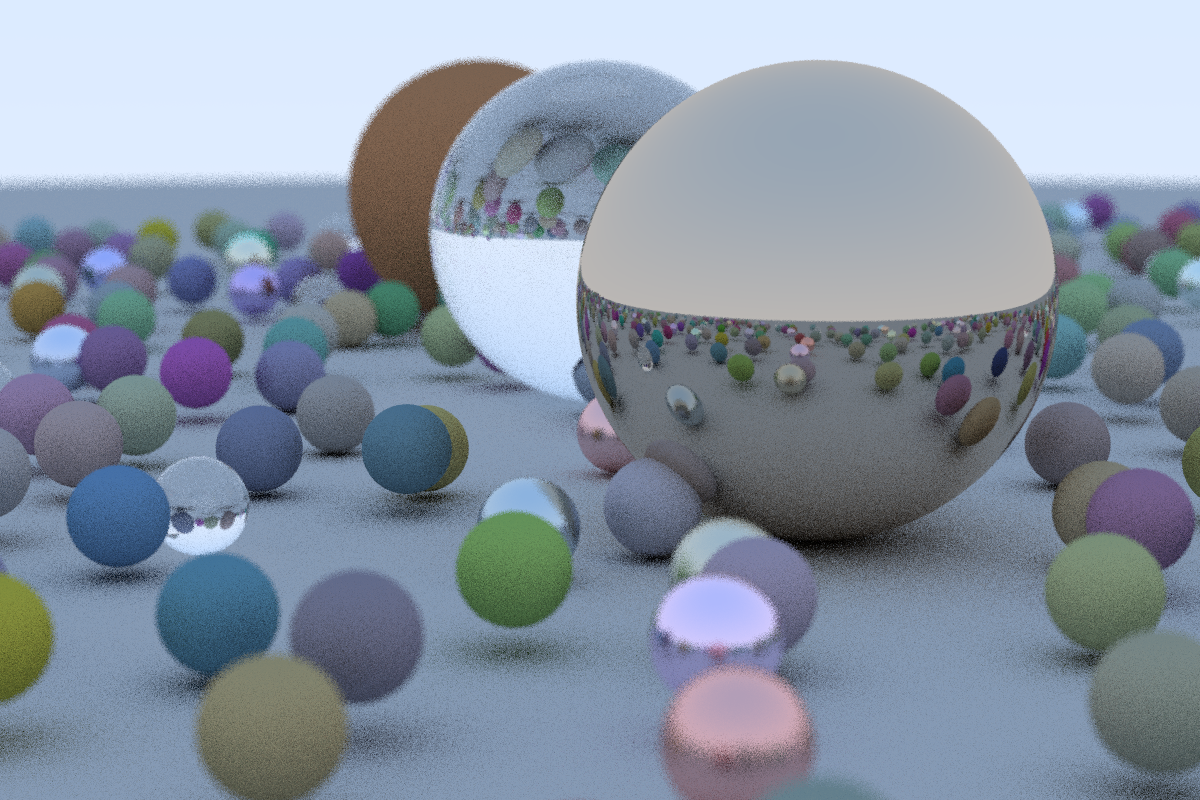

In [7]:
# number of samples (rays) per pixel
ns = 10

img = renderimage(nx, ny, ns, scene, camera)

# show rendered image
transpose(img)

In [8]:
# save to disk
save("random_scene.png", transpose(img))